<a href="https://colab.research.google.com/github/mahmoudsegni/MagFace/blob/main/MagFace/inference/best_quality_picture__inference_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/IrvingMeng/MagFace

Cloning into 'MagFace'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 279 (delta 26), reused 23 (delta 22), pack-reused 241
Receiving objects: 100% (279/279), 1.73 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [ ]:
import os
os.chdir("/content/MagFace/inference")

In [ ]:
!cp -r '/content/drive/MyDrive/best quality/magface_epoch_00025.pth' '/content/MagFace/inference'

In [77]:
from PIL import Image
import os

# Set the directory paths
input_dir = "/content/MagFace/inference/toy_imgs/" #any input directory
output_dir = "/content/MagFace/inference/new_folder/"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through all the files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):
        # Open the image file
        img = Image.open(os.path.join(input_dir, filename))

        # Resize the image to 122x122 and convert to RGB format
        img = img.resize((112, 112)).convert('RGB')

        # Save the image to the output directory with the same filename
        img.save(os.path.join(output_dir, filename))

        # Print the filename for progress tracking
        print(f"Resized and saved {filename} in {output_dir}")


Resized and saved 3.jpg in /content/MagFace/inference/new_folder/
Resized and saved BlurryDavid.jpg in /content/MagFace/inference/new_folder/
Resized and saved 0.jpg in /content/MagFace/inference/new_folder/
Resized and saved 1.jpg in /content/MagFace/inference/new_folder/
Resized and saved 2.jpg in /content/MagFace/inference/new_folder/


In [ ]:
# In this step we need to create the image list folowing this logic
# new_folder/0.jpg
# new_folder/1.jpg
# new_folder/2.jpg


In [ ]:
import gdown 
url = "https://drive.google.com/uc?id=1Bd87admxOZvbIOAyTkGEntsEz3fyMt7H"
gdown.download(url,quiet=False)

In [78]:
!python3 gen_feat.py --inf_list new_folder/img.list --feat_list new_folder/feat.list --resume magface_epoch_00025.pth

=> parse the args ...
=> parse the args ...
{'arch': 'iresnet100',
 'batch_size': 256,
 'cpu_mode': False,
 'dist': 1,
 'embedding_size': 512,
 'feat_list': 'new_folder/feat.list',
 'inf_list': 'new_folder/img.list',
 'print_freq': 100,
 'resume': 'magface_epoch_00025.pth',
 'workers': 4}
=> torch version : 2.0.0+cu118
=> ngpus : 1
=> modeling the network ...
=> loading pth from magface_epoch_00025.pth ...
=> building the dataloader ...
=> preparing dataset for inference ...
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
=> starting inference engine ...
=> embedding 

In [79]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white") 
%matplotlib inline

In [80]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def show(idx_):
    imgname = imgnames[idx_]
    img = cv2.imread(imgname)
    imshow(img)
    print(img_2_mag[imgname], imgname)    

In [81]:
with open('new_folder/feat.list', 'r') as f:
    lines = f.readlines()


In [82]:
img_2_feats = {}
img_2_mag = {}
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0]
    feats = [float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag

In [83]:
imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags)


In [84]:
H, W = 112, 112
NH, NW = 1, 10
canvas = np.zeros((NH * H, NW * W, 3), np.uint8)

for i, ele in enumerate(sort_idx):
    imgname = '/'.join(imgnames[ele].split('/')[-2:])
    img = cv2.imread(imgname)
    canvas[int(i / NW) * H: (int(i / NW) + 1) * H, (i % NW) * W: ((i % NW) + 1) * W, :] = img    

[19.23, 20.95, 21.8, 26.08]


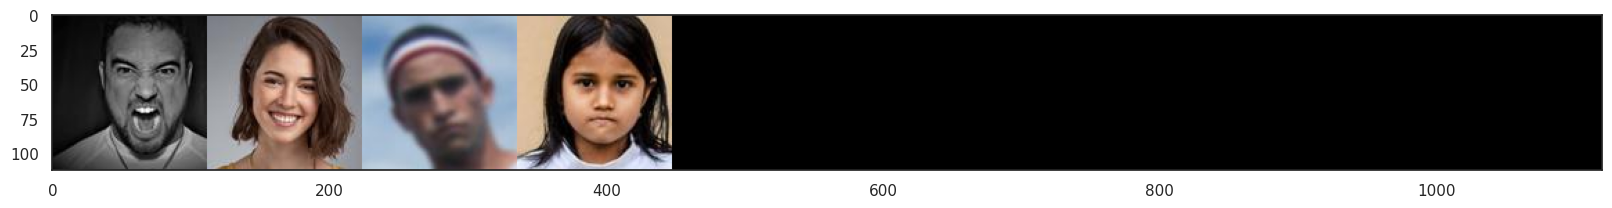

In [85]:
plt.figure(figsize=(20, 20))
print([float('{0:.2f}'.format(mags[idx_])) for idx_ in sort_idx])
imshow(canvas)

In [ ]:
import gdown 
https://drive.google.com/file/d/1Bd87admxOZvbIOAyTkGEntsEz3fyMt7H/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1Bd87admxOZvbIOAyTkGEntsEz3fyMt7H
To: /content/MagFace/inference/magface_epoch_00025.pth
100%|██████████| 283M/283M [00:02<00:00, 130MB/s]


'magface_epoch_00025.pth'